In [3]:
import os
os.getcwd()

'/Users/hri/east/ML'

In [6]:
import pandas as pd
bmi = pd.read_csv('bmi_500.csv')
bmi

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight
...,...,...,...,...
495,Female,150,153,Extreme Obesity
496,Female,184,121,Obesity
497,Female,141,136,Extreme Obesity
498,Male,150,95,Extreme Obesity


#### 머신러닝의 7과정
1. 문제 정의
2. 데이터 수집(File, Survey, Database, IoT Sensor)
3. 데이터 전처리
   - 결측치, 이상치, 특성공학(Scaling, Encoding, Binning, Transform)
5. 탐색적 데이터 분석
   - 기술통계량, 시각화
6. Model선택, Hyper Parameter 조정
7. Model 학습(fit)
8. Model 평가(Evaluate)

1. 문제정의
- 500명의 키와, 몸무게, 비만도 레이블을 이용해서 비만 정도를 판단하는 모델 만들어보기

2. 데이터 수집
- csv파일 로드

In [8]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier #KNN모델 불러오기
from sklearn import metrics

In [10]:
import pandas as pd
tbl = pd.read_csv('bmi_500.csv', index_col = 'Label')
tbl

,Gender,Height,Weight
Label,,,
Obesity,Male,174,96
Normal,Male,189,87
Obesity,Female,185,110
Overweight,Female,195,104
Overweight,Male,149,61
...,...,...,...
Extreme Obesity,Female,150,153
Obesity,Female,184,121
Extreme Obesity,Female,141,136


3. 데이터 전처리
- 전처리가 필요없는 학습용 데이터

4. 탐색적 데이터 분석(EDA)
   - 데이터의 특성 파악

In [11]:
tbl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, Obesity to Extreme Obesity
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 15.6+ KB


In [12]:
tbl['Height']

Label
Obesity            174
Normal             189
Obesity            185
Overweight         195
Overweight         149
                  ... 
Extreme Obesity    150
Obesity            184
Extreme Obesity    141
Extreme Obesity    150
Extreme Obesity    173
Name: Height, Length: 500, dtype: int64

In [16]:
tbl[['Gender', 'Height', 'Weight']].groupby(['Gender']).mean()

,Height,Weight
Gender,,
Female,170.227451,105.698039
Male,169.648980,106.314286


In [15]:
tbl.describe()

,Height,Weight
count,500.000000,500.000000
mean,169.944000,106.000000
std,16.375261,32.382607
min,140.000000,50.000000
25%,156.000000,80.000000
50%,170.500000,106.000000
75%,184.000000,136.000000
max,199.000000,160.000000


In [20]:
tbl.index.unique()

Index(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'],
      dtype='object', name='Label')

In [23]:
# bmi 지수가 Extreme Obesity인 사람 몇 명?
tbl[tbl.index == 'Extreme Obesity'].count()

Gender    198
Height    198
Weight    198
dtype: int64

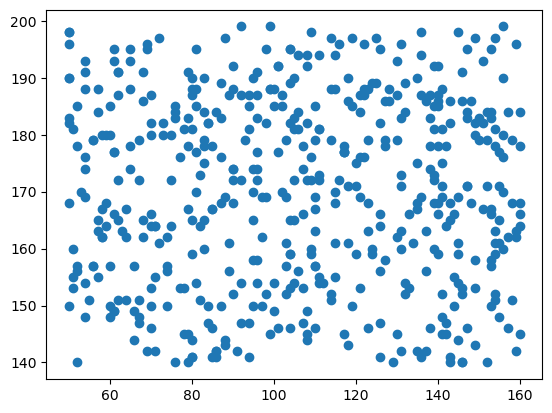

In [24]:
#데이터 시각화
#산점도 그래프로 전체 데이터 시각화

plt.scatter(tbl['Weight'],
           tbl['Height'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


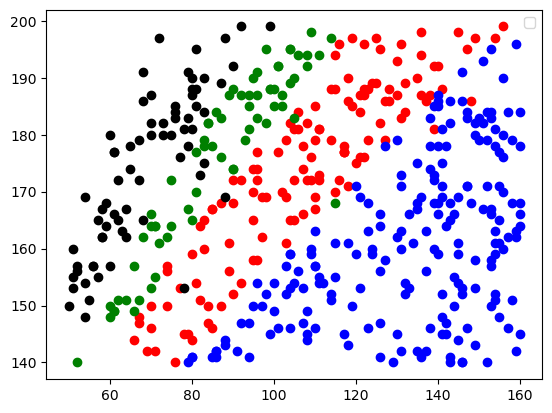

In [37]:
#bmi Obesity 등급만 산점도 시각화 해보기
plt.scatter(tbl['Weight'][tbl.index == 'Obesity'],
           tbl['Height'][tbl.index == 'Obesity'],
           c='red')

plt.scatter(tbl['Weight'][tbl.index == 'Normal'],
           tbl['Height'][tbl.index == 'Normal'],
           c='black')

plt.scatter(tbl['Weight'][tbl.index == 'Overweight'],
           tbl['Height'][tbl.index == 'Overweight'],
           c='green')

plt.scatter(tbl['Weight'][tbl.index == 'Extreme Obesity'],
           tbl['Height'][tbl.index == 'Extreme Obesity'],
           c='blue')

plt.legend()

Text(0, 0.5, 'Height')

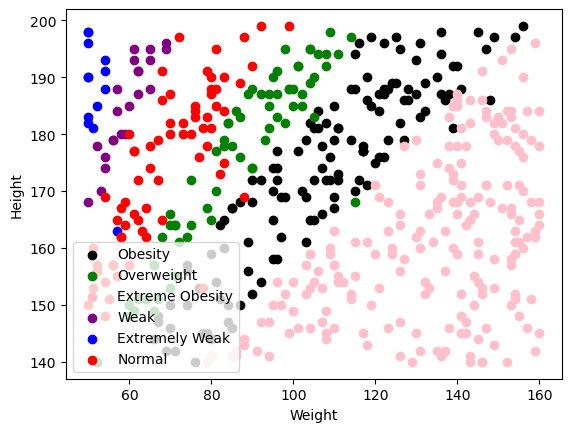

In [42]:
#각 비만도 등급(6개)별로 시각화

def myscatter(class_name, color):
    tmp = tbl.loc[class_name]
    plt.scatter(tmp['Weight'],
               tmp['Height'],
               c=color,
               label = class_name)

myscatter('Obesity', 'black')
myscatter('Overweight', 'green')
myscatter('Extreme Obesity', 'pink')
myscatter('Weak', 'purple')
myscatter('Extremely Weak', 'blue')
myscatter('Normal', 'red')

plt.legend()
plt.xlabel('Weight')
plt.ylabel('Height')

5. 모델링 및 학습 평가
- 문제데이터, 정답데이터 분리
- train, test 셋 분리
- 모델 생성
- 학습
- 평가 및 하이퍼파라미터 조정

In [46]:
data = pd.read_csv('bmi_500.csv')

In [49]:
#데이터 분리
x = data.iloc[:, 1:3]
y = data.loc[:, 'Label']

In [55]:
print(x.shape)
print(y.shape)

(500, 2)
(500,)


In [119]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42
)

In [120]:
X_train.shape

(350, 2)

In [142]:
# n_neighbors 값은 전체 학습 데이터수의 제곱근 값을 먼저 기준을 잡기
knn_model = KNeighborsClassifier(n_neighbors=5)

In [143]:
#학습
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [144]:
pred = knn_model.predict(X_test)

In [145]:
#모델이 예측한 결과값과 실제 정답을 넣고 정확도 평가
metrics.accuracy_score(pred, y_test)

0.8733333333333333

In [146]:
knn_model.score(X_test, y_test)

0.8733333333333333

In [147]:
#정확도 외 다른 지표들
from sklearn.metrics import classification_report

In [148]:
print(classification_report(y_test, pred))

                 precision    recall  f1-score   support

Extreme Obesity       0.89      0.95      0.92        58
 Extremely Weak       1.00      1.00      1.00         1
         Normal       1.00      0.79      0.88        28
        Obesity       0.90      0.78      0.84        46
     Overweight       0.67      1.00      0.80        12
           Weak       0.71      1.00      0.83         5

       accuracy                           0.87       150
      macro avg       0.86      0.92      0.88       150
   weighted avg       0.89      0.87      0.87       150



In [ ]:
# weak 정밀도 0.71 : 모델이 저체중이라고 예측한 것 중에, 실제로도 저체중인 경우
# weak 재현율 1.00 : 실제로 저체중 중, 모델이 저체중이라고 예측한 비율

# 정밀도 : 가짜를 진짜로 착각하는 건 안되는 경우에 중요
# 재현율 : 진짜를 가짜로 착각하는 건 안되는 경우에 중요
# 재현율이 더 중요하다

In [154]:
#학습된 모델에 내 키와 몸무게를 넣어서 결과를 확인해보자
knn_model.predict([[192, 70]])

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Weak'], dtype=object)